In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

In [3]:
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Let's load the detector
    detector = dlib.get_frontal_face_detector()
    
    # Detect faces, see http://dlib.net/face_detector.py.html
    # 1 --> upsampling factor
    rects = detector(gray, 1)
    
    result_dlib = np.copy(img)
    
    # Draw rectangle around each face
    for rect in rects:    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)
        color = [int(np.random.randint(256)) for _ in range(3)]
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), color, 3)
    
    return result_dlib

In [4]:
def plot_detected_faces_img(source_path):
    img = cv2.imread(source_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detected = detect_faces(img)
    plt.imshow(detected)

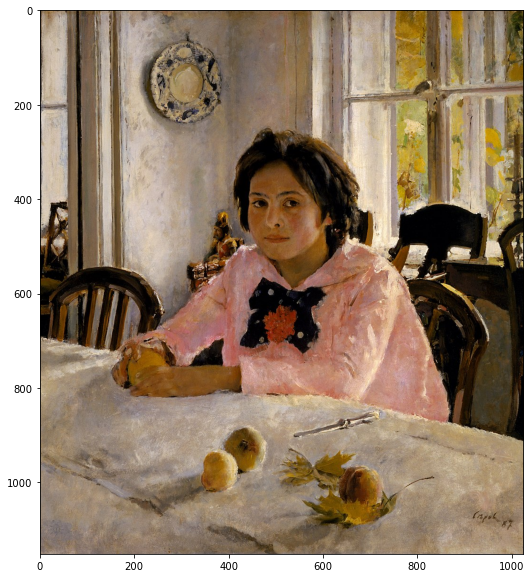

In [5]:
img = cv2.imread('../data/source3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

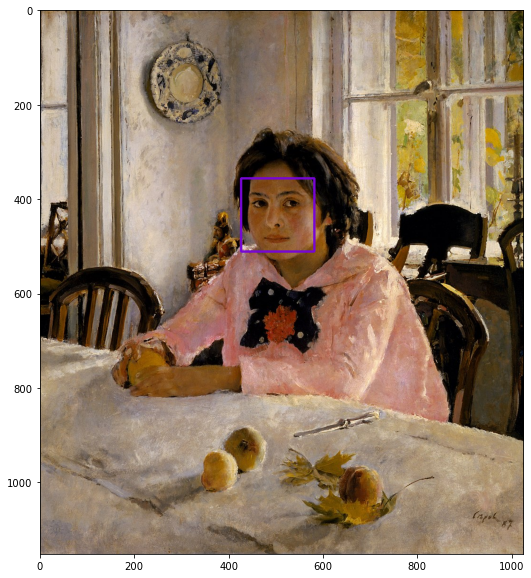

In [6]:
plt.imshow(detect_faces(img))

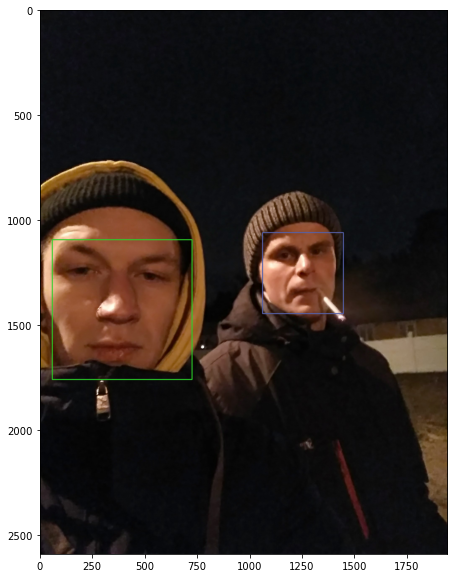

In [7]:
plot_detected_faces_img("../data/detect/0.jpg")

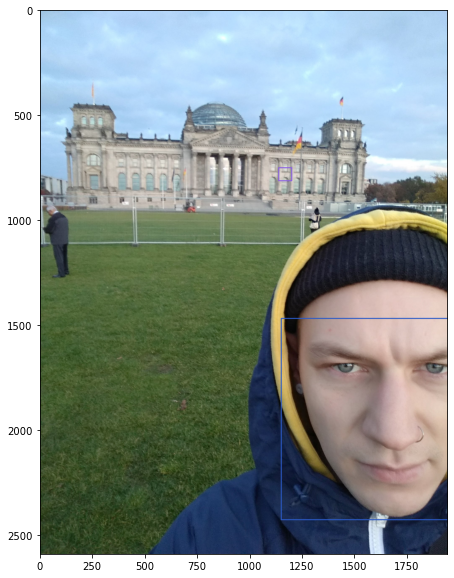

In [8]:
plot_detected_faces_img("../data/detect/1.jpg")

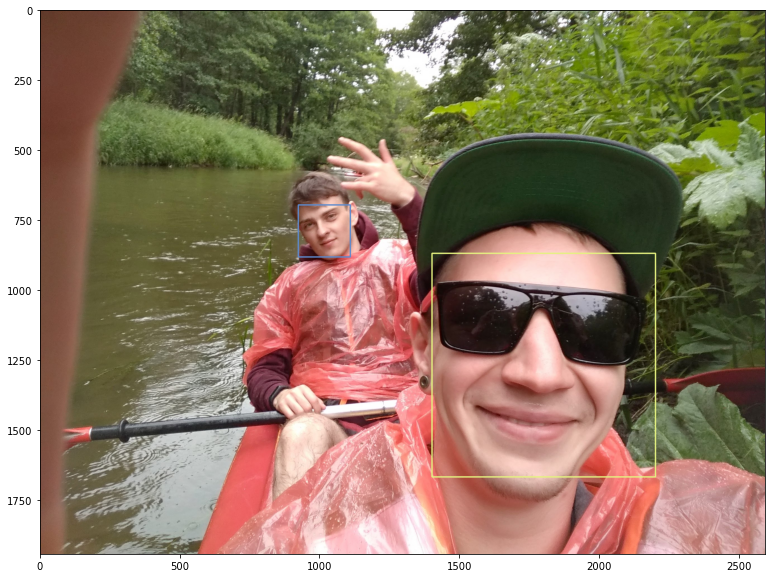

In [9]:
plot_detected_faces_img("../data/detect/3.jpg")

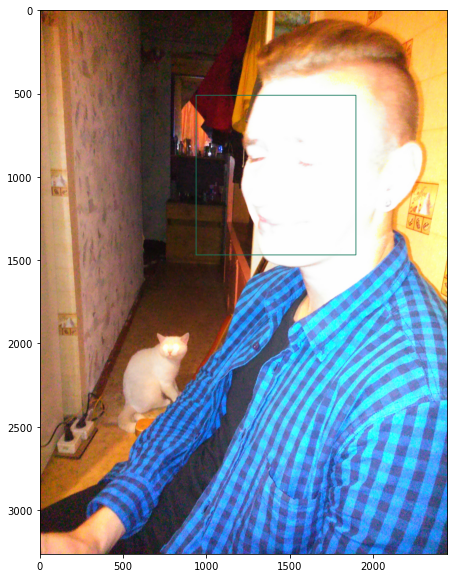

In [10]:
plot_detected_faces_img("../data/detect/4.jpg")

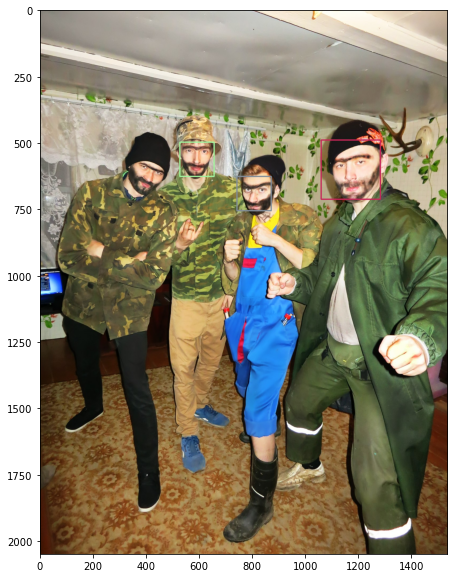

In [11]:
plot_detected_faces_img("../data/detect/6.jpg")

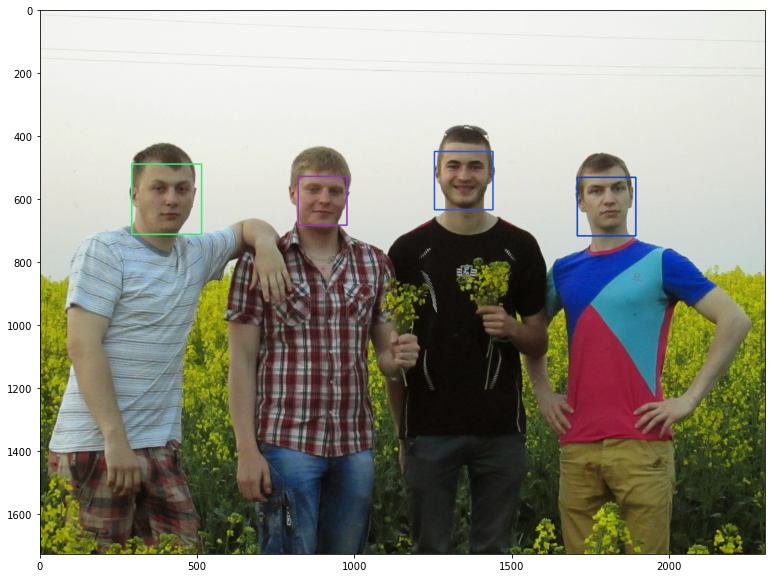

In [12]:
plot_detected_faces_img("../data/detect/7.jpg")

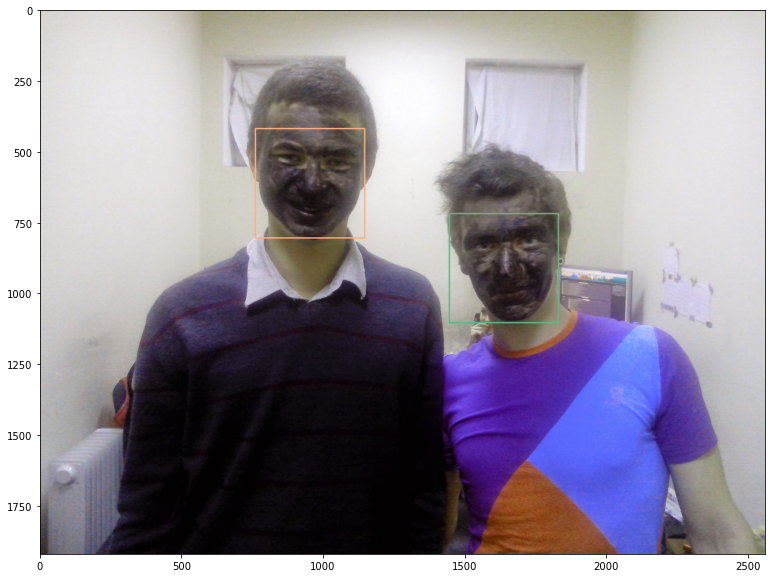

In [13]:
plot_detected_faces_img("../data/detect/8.jpg")

Детектор срабатывает на лица в гриме, с очками, на фото с засветами и в целом работает неплохо. Но бывают моменты когда не детектит.